In [1]:
import numpy as np
import pandas as pd

pd.options.display.max_columns = None
pd.options.display.max_rows = None

from matplotlib import pyplot as plt
import seaborn as sns


In [2]:
df_2022 = pd.read_csv("../data/2022-23_reg_season_clean.csv")
df_2023 = pd.read_csv("../data/2023-24_reg_season_clean.csv")


# main df
# df = df_2022.copy()
df = df_2023.copy()

# convert to date type
df["game_time"] = pd.to_datetime(df["game_time"])
df["date"] = pd.to_datetime(df["date"])

print(df_2022.shape)
print(df_2023.shape)
df.head()

(2460, 70)
(2400, 70)


,team,opponent,day_of_week,date,Start (ET),season_start_year,is_playoff,is_home_game,game_time,city_team_key,abbreviation,timezone,time_diff_from_et,elevation,Latitude,Longitude,city_team_key_opponent,abbreviation_opponent,timezone_opponent,time_diff_from_et_opponent,elevation_opponent,Latitude_opponent,Longitude_opponent,is_covid_bubble,is_pre_nba_cup_knockout,is_post_nba_cup,game_time_diff_from_et,game_lat,game_lon,game_elevation,home_team_abbr,away_team_abbr,game_id,time_since_prev_game,is_last_game_home,is_2_games_ago_home,is_3_games_ago_home,is_4_games_ago_home,is_5_games_ago_home,is_6_games_ago_home,is_7_games_ago_home,num_away_last_5_games,start_of_streak,streak_id,streak_counter,incoming_away_game_streak,days_since_1_games_ago,days_since_2_games_ago,days_since_3_games_ago,days_since_4_games_ago,days_since_5_games_ago,days_since_6_games_ago,days_since_7_games_ago,num_games_last_4_days,num_games_last_7_days,prev_game_lon,prev_game_lat,distance_from_previous_game,cumulative_distance,is_back_to_back,team_opponent,abbreviation_opponent.1,time_since_prev_game_opponent,num_games_last_7_days_opponent,distance_from_previous_game_opponent,cumulative_distance_opponent,hours_of_rest_difference,games_last_7_diff,prev_game_distance_diff,cumulative_distance_diff
0,Atlanta Hawks,Charlotte Hornets,Wed,2023-10-25,7:00p,2023,0,0,2023-10-25 19:00:00,Atlanta Hawks,ATL,America/New_York,0,1023,33.757,84.396,Charlotte Hornets,CHA,America/New_York,0,721,35.225,80.839,0,1,0,0,35.225,80.839,721,CHA,ATL,ATL@CHA_2023-10-25,-1.0,1,1,1,1,1,1,1,0,True,1,1,0,150.0,150.0,150.0,150.0,150.0,150.0,150.0,0,0,84.396,33.757,226.016193,226.016193,0,Charlotte Hornets,CHA,-1.0,0,0.000000,0.000000,0.0,0,226.016193,226.016193
1,Atlanta Hawks,New York Knicks,Fri,2023-10-27,7:30p,2023,0,1,2023-10-27 19:30:00,Atlanta Hawks,ATL,America/New_York,0,1023,33.757,84.396,New York Knicks,NYK,America/New_York,0,35,40.751,73.993,0,1,0,0,33.757,84.396,1023,ATL,NYK,NYK@ATL_2023-10-27,48.5,0,1,1,1,1,1,1,1,True,2,1,0,2.0,150.0,150.0,150.0,150.0,150.0,150.0,1,1,80.839,35.225,226.016193,452.032386,0,New York Knicks,NYK,48.5,1,746.273513,746.273513,0.0,0,-520.257320,-294.241127
2,Atlanta Hawks,Milwaukee Bucks,Sun,2023-10-29,7:00p,2023,0,0,2023-10-29 19:00:00,Atlanta Hawks,ATL,America/New_York,0,1023,33.757,84.396,Milwaukee Bucks,MIL,America/Chicago,-1,593,43.045,87.917,0,1,0,-1,43.045,87.917,593,MIL,ATL,ATL@MIL_2023-10-29,47.5,1,0,1,1,1,1,1,1,True,3,1,0,2.0,4.0,150.0,150.0,150.0,150.0,150.0,2,2,84.396,33.757,667.804853,667.804853,0,Milwaukee Bucks,MIL,71.5,1,0.000000,0.000000,-24.0,1,667.804853,667.804853
3,Atlanta Hawks,Minnesota Timberwolves,Mon,2023-10-30,7:30p,2023,0,1,2023-10-30 19:30:00,Atlanta Hawks,ATL,America/New_York,0,1023,33.757,84.396,Minnesota Timberwolves,MIN,America/Chicago,-1,845,44.980,93.276,0,1,0,0,33.757,84.396,1023,ATL,MIN,MIN@ATL_2023-10-30,24.5,0,1,0,1,1,1,1,2,True,4,1,0,1.0,3.0,5.0,150.0,150.0,150.0,150.0,2,3,87.917,43.045,667.804853,1335.609706,1,Minnesota Timberwolves,MIN,47.5,2,905.694219,905.694219,-23.0,1,-237.889366,429.915487
4,Atlanta Hawks,Washington Wizards,Wed,2023-11-01,7:30p,2023,0,1,2023-11-01 19:30:00,Atlanta Hawks,ATL,America/New_York,0,1023,33.757,84.396,Washington Wizards,WAS,America/New_York,0,46,38.898,77.021,0,1,0,0,33.757,84.396,1023,ATL,WAS,WAS@ATL_2023-11-01,48.0,1,0,1,0,1,1,1,2,False,4,2,0,2.0,3.0,5.0,7.0,150.0,150.0,150.0,2,4,84.396,33.757,0.000000,0.000000,0,Washington Wizards,WAS,48.5,3,541.319182,541.319182,-0.5,1,-541.319182,-541.319182


In [3]:
df['season_start_year'].unique()

array([2023])

In [4]:
# df.columns

In [5]:
# potential new features to add

In [6]:
# mark the week of season
df['week_number'] = df['date'].dt.isocalendar().week
df['week_of_season'] = np.where(df['week_number'] >= 43, df['week_number'] - 42, df['week_number'] + 1 +(df['week_number'].max() - df['week_number'][0]))

df['team_game_id'] = df.groupby('abbreviation').cumcount() + 1
df.head()

,team,opponent,day_of_week,date,Start (ET),season_start_year,is_playoff,is_home_game,game_time,city_team_key,abbreviation,timezone,time_diff_from_et,elevation,Latitude,Longitude,city_team_key_opponent,abbreviation_opponent,timezone_opponent,time_diff_from_et_opponent,elevation_opponent,Latitude_opponent,Longitude_opponent,is_covid_bubble,is_pre_nba_cup_knockout,is_post_nba_cup,game_time_diff_from_et,game_lat,game_lon,game_elevation,home_team_abbr,away_team_abbr,game_id,time_since_prev_game,is_last_game_home,is_2_games_ago_home,is_3_games_ago_home,is_4_games_ago_home,is_5_games_ago_home,is_6_games_ago_home,is_7_games_ago_home,num_away_last_5_games,start_of_streak,streak_id,streak_counter,incoming_away_game_streak,days_since_1_games_ago,days_since_2_games_ago,days_since_3_games_ago,days_since_4_games_ago,days_since_5_games_ago,days_since_6_games_ago,days_since_7_games_ago,num_games_last_4_days,num_games_last_7_days,prev_game_lon,prev_game_lat,distance_from_previous_game,cumulative_distance,is_back_to_back,team_opponent,abbreviation_opponent.1,time_since_prev_game_opponent,num_games_last_7_days_opponent,distance_from_previous_game_opponent,cumulative_distance_opponent,hours_of_rest_difference,games_last_7_diff,prev_game_distance_diff,cumulative_distance_diff,week_number,week_of_season,team_game_id
0,Atlanta Hawks,Charlotte Hornets,Wed,2023-10-25,7:00p,2023,0,0,2023-10-25 19:00:00,Atlanta Hawks,ATL,America/New_York,0,1023,33.757,84.396,Charlotte Hornets,CHA,America/New_York,0,721,35.225,80.839,0,1,0,0,35.225,80.839,721,CHA,ATL,ATL@CHA_2023-10-25,-1.0,1,1,1,1,1,1,1,0,True,1,1,0,150.0,150.0,150.0,150.0,150.0,150.0,150.0,0,0,84.396,33.757,226.016193,226.016193,0,Charlotte Hornets,CHA,-1.0,0,0.000000,0.000000,0.0,0,226.016193,226.016193,43,1,1
1,Atlanta Hawks,New York Knicks,Fri,2023-10-27,7:30p,2023,0,1,2023-10-27 19:30:00,Atlanta Hawks,ATL,America/New_York,0,1023,33.757,84.396,New York Knicks,NYK,America/New_York,0,35,40.751,73.993,0,1,0,0,33.757,84.396,1023,ATL,NYK,NYK@ATL_2023-10-27,48.5,0,1,1,1,1,1,1,1,True,2,1,0,2.0,150.0,150.0,150.0,150.0,150.0,150.0,1,1,80.839,35.225,226.016193,452.032386,0,New York Knicks,NYK,48.5,1,746.273513,746.273513,0.0,0,-520.257320,-294.241127,43,1,2
2,Atlanta Hawks,Milwaukee Bucks,Sun,2023-10-29,7:00p,2023,0,0,2023-10-29 19:00:00,Atlanta Hawks,ATL,America/New_York,0,1023,33.757,84.396,Milwaukee Bucks,MIL,America/Chicago,-1,593,43.045,87.917,0,1,0,-1,43.045,87.917,593,MIL,ATL,ATL@MIL_2023-10-29,47.5,1,0,1,1,1,1,1,1,True,3,1,0,2.0,4.0,150.0,150.0,150.0,150.0,150.0,2,2,84.396,33.757,667.804853,667.804853,0,Milwaukee Bucks,MIL,71.5,1,0.000000,0.000000,-24.0,1,667.804853,667.804853,43,1,3
3,Atlanta Hawks,Minnesota Timberwolves,Mon,2023-10-30,7:30p,2023,0,1,2023-10-30 19:30:00,Atlanta Hawks,ATL,America/New_York,0,1023,33.757,84.396,Minnesota Timberwolves,MIN,America/Chicago,-1,845,44.980,93.276,0,1,0,0,33.757,84.396,1023,ATL,MIN,MIN@ATL_2023-10-30,24.5,0,1,0,1,1,1,1,2,True,4,1,0,1.0,3.0,5.0,150.0,150.0,150.0,150.0,2,3,87.917,43.045,667.804853,1335.609706,1,Minnesota Timberwolves,MIN,47.5,2,905.694219,905.694219,-23.0,1,-237.889366,429.915487,44,2,4
4,Atlanta Hawks,Washington Wizards,Wed,2023-11-01,7:30p,2023,0,1,2023-11-01 19:30:00,Atlanta Hawks,ATL,America/New_York,0,1023,33.757,84.396,Washington Wizards,WAS,America/New_York,0,46,38.898,77.021,0,1,0,0,33.757,84.396,1023,ATL,WAS,WAS@ATL_2023-11-01,48.0,1,0,1,0,1,1,1,2,False,4,2,0,2.0,3.0,5.0,7.0,150.0,150.0,150.0,2,4,84.396,33.757,0.000000,0.000000,0,Washington Wizards,WAS,48.5,3,541.319182,541.319182,-0.5,1,-541.319182,-541.319182,44,2,5


In [7]:
# mark the first game after the 12/2
# after_cup_dict = df[df['date'].gt("2023-12-15")].groupby('team_name').first()['team_game_id'].to_dict()
# after_cup_dict

after_cup_dict = df[df['date'].gt("2023-12-02")].groupby('abbreviation').first()['team_game_id'].to_dict()
# after_cup_dict

df['after_id'] = df['abbreviation'].map(after_cup_dict)
df['is_first_after_cup'] = np.where(df['team_game_id'] == df['after_id'], 1, 0)
df['distance_from_previous_game'] = np.where(df['is_first_after_cup'] == 1, 0, df['distance_from_previous_game'])
df[['team', 'date', 'team_game_id',"is_home_game", "opponent", 'distance_from_previous_game', 'is_first_after_cup']].head(30)

,team,date,team_game_id,is_home_game,opponent,distance_from_previous_game,is_first_after_cup
0,Atlanta Hawks,2023-10-25,1,0,Charlotte Hornets,226.016193,0
1,Atlanta Hawks,2023-10-27,2,1,New York Knicks,226.016193,0
2,Atlanta Hawks,2023-10-29,3,0,Milwaukee Bucks,667.804853,0
3,Atlanta Hawks,2023-10-30,4,1,Minnesota Timberwolves,667.804853,0
4,Atlanta Hawks,2023-11-01,5,1,Washington Wizards,0.000000,0
5,Atlanta Hawks,2023-11-04,6,0,New Orleans Pelicans,423.875640,0
6,Atlanta Hawks,2023-11-06,7,0,Oklahoma City Thunder,574.484612,0
7,Atlanta Hawks,2023-11-09,8,0,Orlando Magic,1055.109677,0
8,Atlanta Hawks,2023-11-11,9,1,Miami Heat,401.174473,0
9,Atlanta Hawks,2023-11-14,10,0,Detroit Pistons,596.222902,0


In [8]:
# after_cup_dict

In [9]:
df.head(3)

,team,opponent,day_of_week,date,Start (ET),season_start_year,is_playoff,is_home_game,game_time,city_team_key,abbreviation,timezone,time_diff_from_et,elevation,Latitude,Longitude,city_team_key_opponent,abbreviation_opponent,timezone_opponent,time_diff_from_et_opponent,elevation_opponent,Latitude_opponent,Longitude_opponent,is_covid_bubble,is_pre_nba_cup_knockout,is_post_nba_cup,game_time_diff_from_et,game_lat,game_lon,game_elevation,home_team_abbr,away_team_abbr,game_id,time_since_prev_game,is_last_game_home,is_2_games_ago_home,is_3_games_ago_home,is_4_games_ago_home,is_5_games_ago_home,is_6_games_ago_home,is_7_games_ago_home,num_away_last_5_games,start_of_streak,streak_id,streak_counter,incoming_away_game_streak,days_since_1_games_ago,days_since_2_games_ago,days_since_3_games_ago,days_since_4_games_ago,days_since_5_games_ago,days_since_6_games_ago,days_since_7_games_ago,num_games_last_4_days,num_games_last_7_days,prev_game_lon,prev_game_lat,distance_from_previous_game,cumulative_distance,is_back_to_back,team_opponent,abbreviation_opponent.1,time_since_prev_game_opponent,num_games_last_7_days_opponent,distance_from_previous_game_opponent,cumulative_distance_opponent,hours_of_rest_difference,games_last_7_diff,prev_game_distance_diff,cumulative_distance_diff,week_number,week_of_season,team_game_id,after_id,is_first_after_cup
0,Atlanta Hawks,Charlotte Hornets,Wed,2023-10-25,7:00p,2023,0,0,2023-10-25 19:00:00,Atlanta Hawks,ATL,America/New_York,0,1023,33.757,84.396,Charlotte Hornets,CHA,America/New_York,0,721,35.225,80.839,0,1,0,0,35.225,80.839,721,CHA,ATL,ATL@CHA_2023-10-25,-1.0,1,1,1,1,1,1,1,0,True,1,1,0,150.0,150.0,150.0,150.0,150.0,150.0,150.0,0,0,84.396,33.757,226.016193,226.016193,0,Charlotte Hornets,CHA,-1.0,0,0.000000,0.000000,0.0,0,226.016193,226.016193,43,1,1,20,0
1,Atlanta Hawks,New York Knicks,Fri,2023-10-27,7:30p,2023,0,1,2023-10-27 19:30:00,Atlanta Hawks,ATL,America/New_York,0,1023,33.757,84.396,New York Knicks,NYK,America/New_York,0,35,40.751,73.993,0,1,0,0,33.757,84.396,1023,ATL,NYK,NYK@ATL_2023-10-27,48.5,0,1,1,1,1,1,1,1,True,2,1,0,2.0,150.0,150.0,150.0,150.0,150.0,150.0,1,1,80.839,35.225,226.016193,452.032386,0,New York Knicks,NYK,48.5,1,746.273513,746.273513,0.0,0,-520.257320,-294.241127,43,1,2,20,0
2,Atlanta Hawks,Milwaukee Bucks,Sun,2023-10-29,7:00p,2023,0,0,2023-10-29 19:00:00,Atlanta Hawks,ATL,America/New_York,0,1023,33.757,84.396,Milwaukee Bucks,MIL,America/Chicago,-1,593,43.045,87.917,0,1,0,-1,43.045,87.917,593,MIL,ATL,ATL@MIL_2023-10-29,47.5,1,0,1,1,1,1,1,1,True,3,1,0,2.0,4.0,150.0,150.0,150.0,150.0,150.0,2,2,84.396,33.757,667.804853,667.804853,0,Milwaukee Bucks,MIL,71.5,1,0.000000,0.000000,-24.0,1,667.804853,667.804853,43,1,3,20,0


In [10]:
df['is_post_nba_cup'].unique()

array([0, 1])

In [11]:
# df.columns

In [12]:
# total travel for each team (simple)
piv = df.pivot_table(
    index=["season_start_year","abbreviation", "team"],
    values="distance_from_previous_game",
    aggfunc="sum"
    
).sort_values(by="distance_from_previous_game").reset_index()
piv['team'] = piv['team'].str.split(" ").str[-1]
print(piv.shape)
# piv
# ax = piv.plot(
#     kind="bar",
#     x="abbreviation",
#     legend=False,
#     title="Total Distance traveled by each team for the 2023 Season",
#     ylabel="Miles",
#     xlabel="Team",
#     # grid='y',
#     figsize=(8,4)
# )
# ax.grid(axis="y")
piv.head(2)


(30, 4)


,season_start_year,abbreviation,team,distance_from_previous_game
0,2023,CLE,Cavaliers,31398.561368
1,2023,IND,Pacers,32437.688911


In [19]:
piv.rename(columns={"distance_from_previous_game":"distance_traveled"}).round(2).to_csv("../data/travel_pivot.csv", index=False)


In [14]:
# piv.reset_index(drop=True).to_dict()

/var/folders/dq/n1gz5xz55cj7qv8f04fcsb0m0000gp/T/ipykernel_41009/1642293192.py:113: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


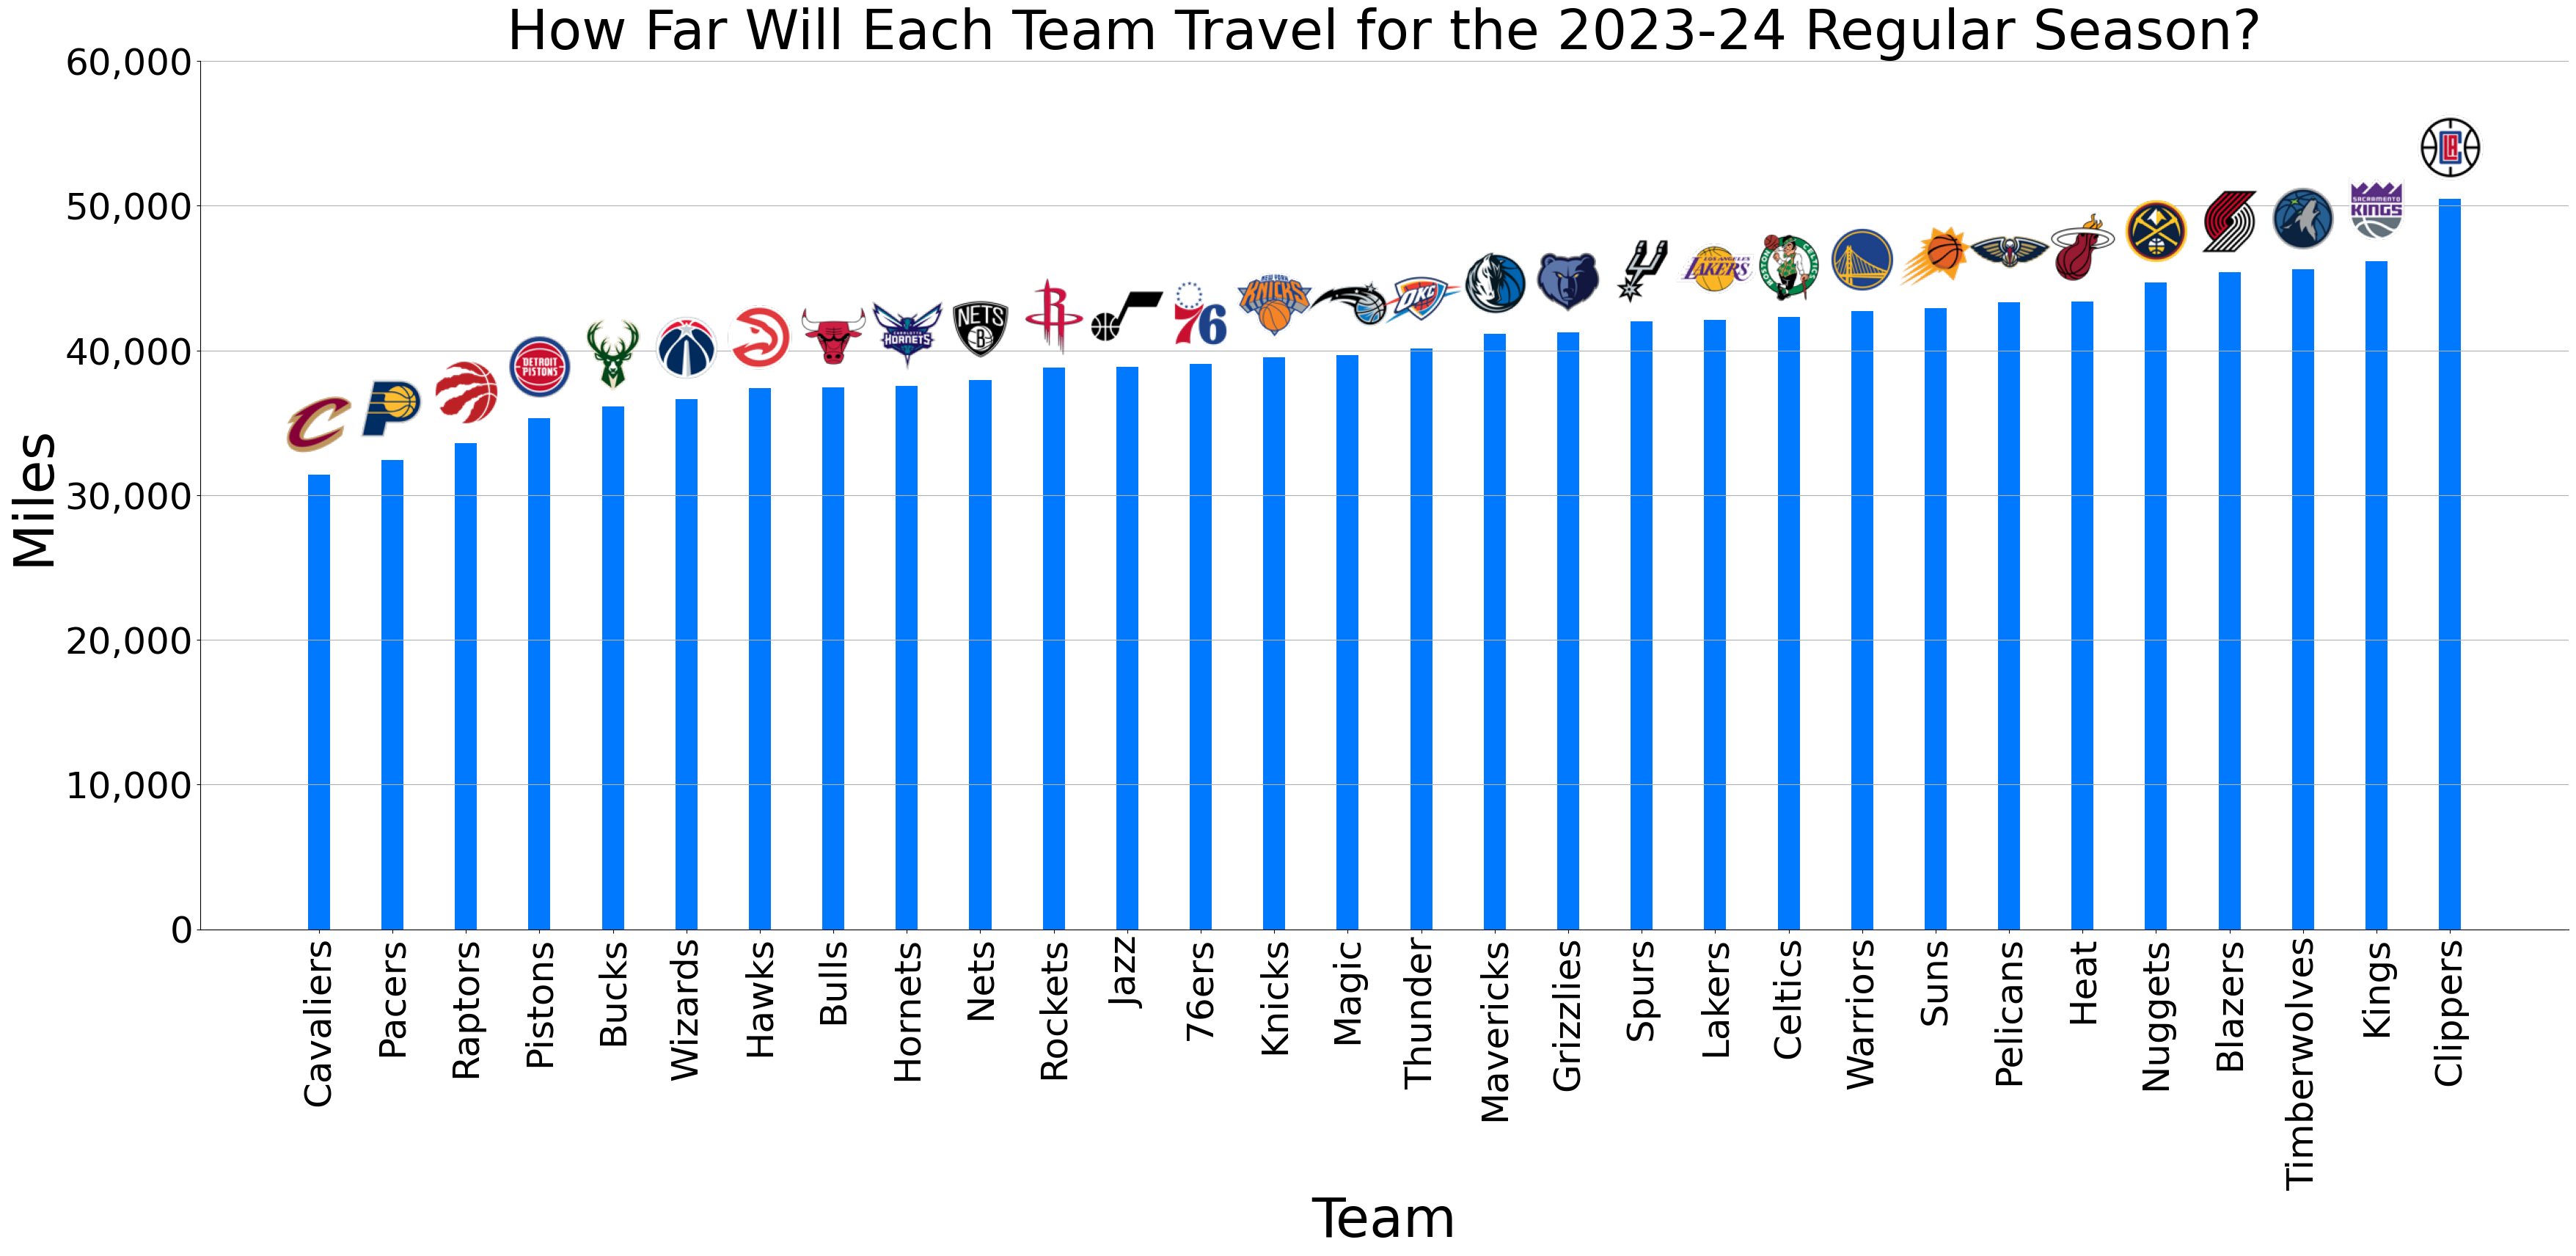

[2023]


In [15]:
# make chart
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image


SMALL_SIZE = 12 * 3
MEDIUM_SIZE = 18 * 3
LARGE_SIZE = 24 * 3

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=LARGE_SIZE)  # fontsize of the figure title



# Define the figure and axes
fig, ax = plt.subplots(figsize=(36, 18))
# fig, ax = plt.subplots()

# # Create the bar chart
bars = ax.bar(
    piv["team"],
    piv["distance_from_previous_game"],
    width=0.3,
    color="#0079FF", 
    # edgecolor="black",
)


# Function to load and display PNG images above the bars
def add_image_above_bar(image_path, ax, bar, offset_x=0, offset_y=3_500):
    img = Image.open(image_path)
    # img = img.convert("RGBA")  # Convert to RGBA format to handle transparency
    # img = img.resize((30, 30))  # Adjust the image size as needed
    img = img.resize((80, 80))  # Adjust the image size as needed
    # img = img.resize((40, 40))  # Adjust the image size as needed

    imagebox = OffsetImage(img, zoom=1)
    ab = AnnotationBbox(
        imagebox,
        (bar.get_x() + bar.get_width() / 2 + offset_x, bar.get_height() + offset_y),
        frameon=False,
    )
    ax.add_artist(ab)


# Load and display PNG images above the bars
for index, row in piv.iterrows():
    # print(index, row['abbreviation'])
    image_path = f"../assets/_nba_png/{row['abbreviation'].lower()}.png"
    add_image_above_bar(image_path, ax, bars[index])


# # add court report logo
# img = Image.open("../assets/_court_report/courtreport.png")
# img = img.resize((444, 100))  # Adjust the image size as needed
# imagebox = OffsetImage(img, zoom=1)

# # ab = AnnotationBbox(
# #     imagebox,
# #     xy=(0, 1.15), # upper left
# #     xycoords="axes fraction",
# #     frameon=False,
# # )
# # ax.add_artist(ab)

# ab = AnnotationBbox(
#     imagebox,
#     xy=(-0.05, -0.3), # lower left
#     xycoords="axes fraction",
#     frameon=False,
# )
# ax.add_artist(ab)

# # ab = AnnotationBbox(
# #     imagebox,
# #     xy=(1, 1.15), # upper right
# #     xycoords="axes fraction",
# #     frameon=False,
# # )
# # ax.add_artist(ab)

# # ab = AnnotationBbox(
# #     imagebox,
# #     xy=(1, -0.45), # lower right
# #     xycoords="axes fraction",
# #     frameon=False,
# # )
# # ax.add_artist(ab)

# Customize the chart
ax.set_xlabel("Team")
# ax.set_xlabel("")
ax.set_ylabel("Miles")
ax.grid(axis="y")


# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)#, ha="right")
# plt.title("Distance traveled by each team for the 2023 Season", fontsize=MEDIUM_SIZE)
# plt.title("Distance traveled by each team for the 2023 Season", fontsize=MEDIUM_SIZE)
plt.title("How Far Will Each Team Travel for the 2023-24 Regular Season?", fontsize=MEDIUM_SIZE)
plt.ylim(0, 60_000)

# after plotting the data, format the labels
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

sns.despine()
plt.tight_layout()

# plt.savefig("travel_1200.png", dpi=1200)
# plt.savefig("travel_400.png", dpi=400)
# plt.savefig("travel_400_logo.png", dpi=400)
# plt.savefig("travel.png")
# plt.savefig("travel_logo.png")
plt.show()
print(piv['season_start_year'].unique())

In [16]:
assert False

AssertionError: 

In [ ]:
# piv = df_2022.pivot_table(
#     index=["season_start_year","abbreviation", "team"],
#     values="distance_from_previous_game",
#     aggfunc="sum"
    
# ).sort_values(by="distance_from_previous_game").reset_index()
# piv['team'] = piv['team'].str.split(" ").str[-1]
# print(piv.shape)


# # Define the figure and axes
# fig, ax = plt.subplots(figsize=(12, 6))

# # # Create the bar chart
# bars = ax.bar(
#     piv["team"],
#     piv["distance_from_previous_game"],
#     width=0.3,
#     # color="gray", 
#     # edgecolor="black",
# )

# # Load and display PNG images above the bars
# for index, row in piv.iterrows():
#     # print(index, row['abbreviation'])
#     image_path = f"../assets/_nba_png/{row['abbreviation'].lower()}.png"
#     add_image_above_bar(image_path, ax, bars[index])

# # Customize the chart
# ax.set_xlabel("Team")
# ax.set_ylabel("Miles")
# # ax.set_title()
# ax.grid(axis="y")


# # Rotate the x-axis labels for better readability
# plt.xticks(rotation=90)#, ha="right")
# # plt.title("Distance traveled by each team for the 2023 Season", fontsize=MEDIUM_SIZE)
# # plt.title("Distance traveled by each team for the 2023 Season", fontsize=MEDIUM_SIZE)
# plt.title("How far did each team travel for the 2022 season?", fontsize=MEDIUM_SIZE)

# # Show the plot
# plt.tight_layout()
# plt.ylim(0, 60_000)
# sns.despine()
# # plt.savefig("")
# plt.show()
# print(piv['season_start_year'].unique())


In [ ]:
# accounting for the tournament
temp = df.copy()

# temp = temp[
#     (temp['abbreviation'] == "ATL")
#     & (temp['date'] >= "2023-11-28")
#     & (temp['date'] <= "2023-12-18")
#     # (temp["is_post_nba_cup"] == 1)
# ]
# print(temp.shape)


# temp.head()

# temp['distance_from_previous_game2'] = temp['distance_from_previous_game']
# temp['distance_from_previous_game2'] = np.where(temp['date'] == "2023-12-11" & temp['is_home_game'],1 , 0)

In [ ]:
assert False

In [ ]:
# travel by week for each team

travel_by_week = df.pivot_table(
    index=["abbreviation", 'week_of_season'],
    values=['distance_from_previous_game'],
    aggfunc=sum
).reset_index()

travel_by_week['smooth'] = travel_by_week["distance_from_previous_game"].rolling(5).mean()

temp = travel_by_week[travel_by_week['abbreviation'].isin(travel_by_week['abbreviation'].unique().tolist()[:4])]

plt.figure(figsize=(10,4))
sns.lineplot(x="week_of_season", y="distance_from_previous_game", data=temp, hue="abbreviation", markers='o')
plt.grid()

plt.figure(figsize=(10,4))
sns.lineplot(x="week_of_season", y="smooth", data=temp, hue="abbreviation", markers='o')
plt.grid()


In [ ]:
# rest by week
# travel by week for each team

vars = ["time_since_prev_game"]
temp = df.pivot_table(
    index=["abbreviation", 'week_of_season'],
    values=vars,
    aggfunc="sum"
).reset_index()

temp['smooth'] = temp[vars[0]].rolling(5).mean()

temp = temp[temp['abbreviation'].isin(temp['abbreviation'].unique().tolist()[:4])]

plt.figure(figsize=(10,4))
sns.lineplot(x="week_of_season", y=vars[0], data=temp, hue="abbreviation", marker='o')
plt.grid()

plt.figure(figsize=(10,4))
sns.lineplot(x="week_of_season", y="smooth", data=temp, hue="abbreviation", marker='o')
plt.grid()


In [ ]:
# games per week
# rest by week
# travel by week for each team

vars = ["time_since_prev_game"]
temp = df.pivot_table(
    index=["abbreviation", 'week_of_season'],
    values=vars,
    aggfunc="count"
).reset_index()

temp['smooth'] = temp[vars[0]].rolling(5).mean()

temp = temp[temp['abbreviation'].isin(temp['abbreviation'].unique().tolist()[:4])]

plt.figure(figsize=(10,4))
sns.lineplot(x="week_of_season", y=vars[0], data=temp, hue="abbreviation", marker='o')
plt.grid()

plt.figure(figsize=(10,4))
sns.lineplot(x="week_of_season", y="smooth", data=temp, hue="abbreviation", marker='o')
plt.grid()


In [ ]:
# for the match ups in a coming week, compare the teams playing each other and the few games prior

In [ ]:
# jetlag (timezone changes) (hours lost vs hours gained)

# number of back-to-backs
#

In [ ]:
# # how many quick turn around games are there in 2023
# a = processed_df[
#     (processed_df["time_since_prev_game"] <= 24)
#     & (processed_df["season_start_year"].isin(list(range(2014, 2024))))
# ]

# a.pivot_table(
#     index=[
#         "season_start_year",
#         # "abbreviation",
#     ],
#     values=["game_id"],
#     aggfunc=["count"],
# )/2

In [ ]:
# number of 4 in 5 sets by season

# number of 5 in 7 sets by season

# number of back-to-backs by season

In [ ]:
plt.figure(figsize=(8,5))
# temp_df = df
temp_df = df[
    (df['team_abbreviation'] == "GSW")
    # & (df['season_start_year'] == 2018)
#     (df['cumulative_distance'] > 3000)
#     & (df['incoming_away_game_streak'] > 2)
]
sns.regplot(x = "cumulative_distance", y="point_difference", data=temp_df, line_kws={"color":"red"})
plt.grid()


In [ ]:
plt.figure(figsize=(8,5))


sns.countplot(x = "incoming_away_game_streak", hue="WL", data=temp_df)
plt.grid()


In [ ]:
temp_df = df[df['team_abbreviation'] == "ATL"]
print(temp_df.shape)
temp_df.head()